# Statistics

In [2]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

## 1. Getting the data

The *RDatasets* package contains the R datasets.

In [3]:
D = RDatasets.dataset("datasets", "faithful")
@show names(D)
@show typeof(D)
D

names(D) = ["Eruptions", "Waiting"]
typeof(D) = DataFrame


,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [4]:
describe(D)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,,,Float64
2,Waiting,70.8971,43,76.0,96,,,Int64


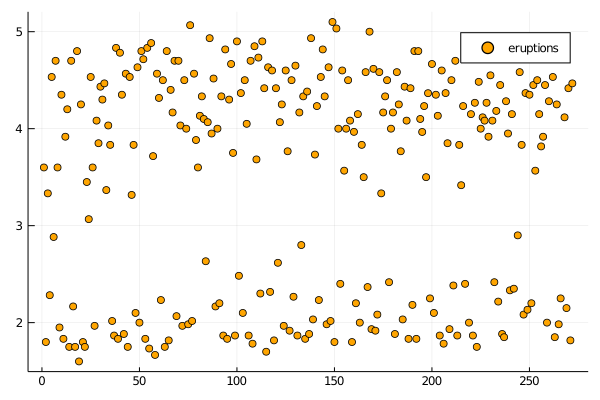

In [5]:
waitTimes = D.Waiting
eruptions = D.Eruptions
scatter(eruptions, label="eruptions", color="orange")

## 2. Statistics plots

### Boxplot

In [6]:
?StatsPlots.boxplot 

```
boxplot(x, y)
boxplot!(x, y)
```

Make a box and whisker plot.

# Keyword arguments

  * `notch`: Bool. Notch the box plot? (false)
  * `range`: Real. Values more than range*IQR below the first quartile          or above the third quartile are shown as outliers (1.5)
  * `outliers`: Bool. Show outliers? (true)
  * `whisker_width`: Real or Symbol. Length of whiskers (:match)

# Example

```julia-repl
julia> using StatsPlots
julia> boxplot(repeat([1,2,3],outer=100),randn(300))
```


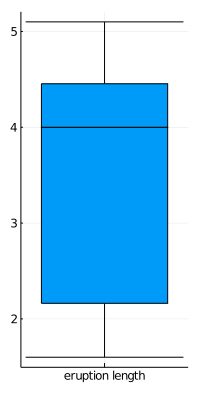

In [7]:
boxplot(["eruption length"], eruptions, legend=false, size=(200,400), whisker_width=1)

### Histogram

In [8]:
?StatsPlots.histogram

```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```


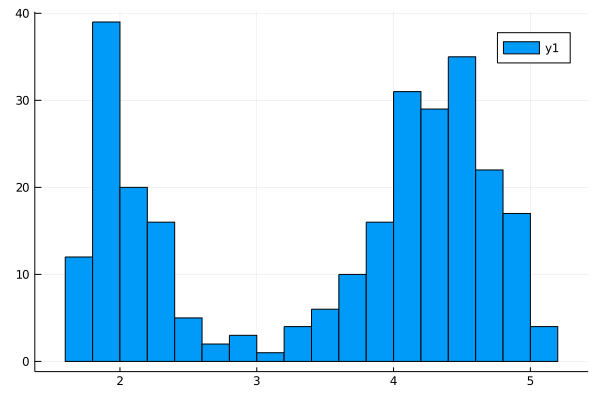

In [9]:
histogram(eruptions, bins=:sqrt, orientation=:v)

### Correlation plot

In [10]:
?StatsPlots.corrplot

```
corrplot
```

This plot type shows the correlation among input variables.   A correlation plot may be produced by a matrix.

A correlation matrix can also be created from the columns of a `DataFrame` using the [`@df`](@ref) macro like so:

```julia
@df iris corrplot([:SepalLength :SepalWidth :PetalLength :PetalWidth])
```

The marker color in scatter plots reveals the degree of correlation.  Pass the desired colorgradient to `markercolor`.

With the default gradient positive correlations are blue, neutral are yellow  and negative are red. In the 2d-histograms, the color gradient shows the frequency  of points in that bin (as usual, controlled by `seriescolor`).


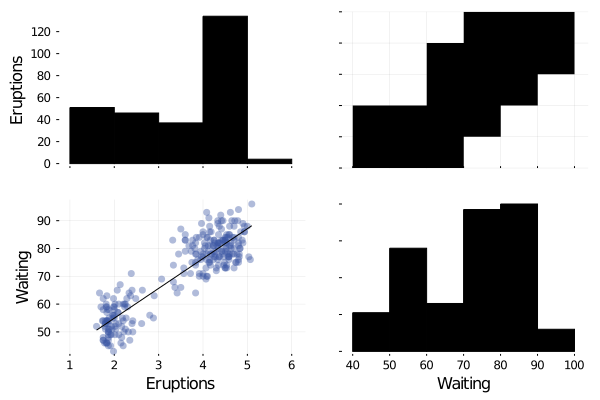

In [12]:
@df D corrplot([:Eruptions :Waiting])

## 3. Kernel density estimates

We can fit a kernel density estimation function to a dataset using the KernelDensity.jl package.

In [14]:
p = kde(eruptions)

UnivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794627968e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.209573105311057e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604054722e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864676889e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

If we want the histogram and the kernel density graph to be aligned we need to remember that the "density contribution" of every point added to one of these histograms is 1/(nb of elements)*bin width.

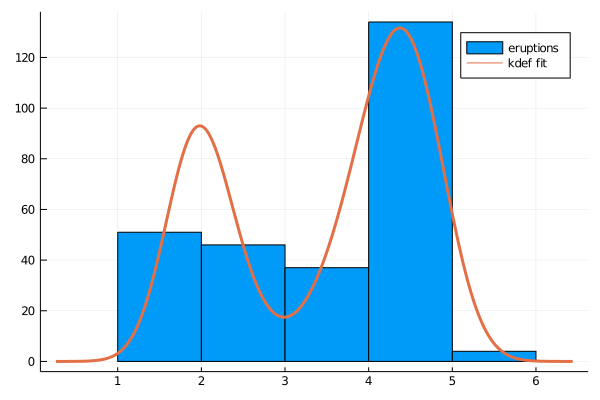

In [15]:
histogram(eruptions, label="eruptions")
plot!(p.x, p.density .* length(eruptions), linewidth=3, color=2, label="kdef fit")

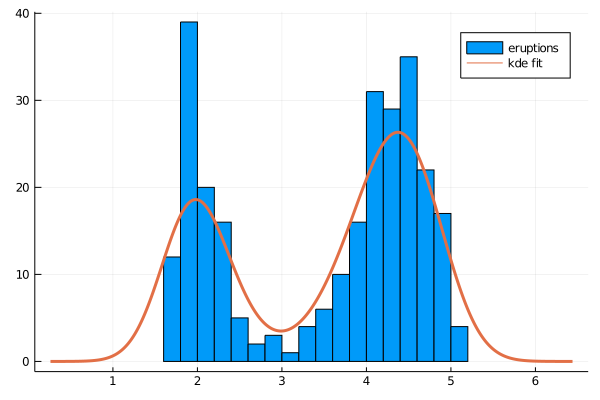

In [16]:
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width


Next, we will take a look at one probablity distribution, namely the normal distribution and verify that it generates a bell curve.

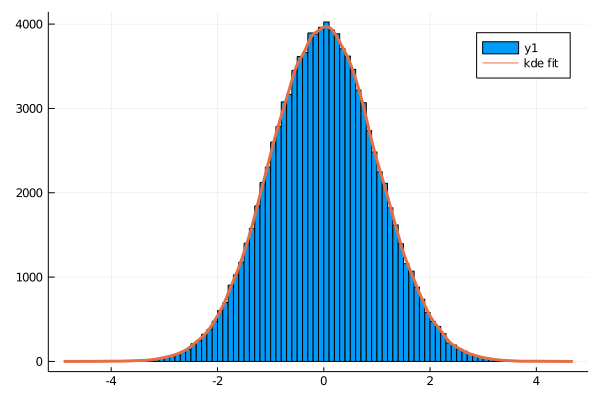

In [27]:
randomVector = randn(100000) # Randomly generate n values 
                             # from a distribution N(0,1)
histogram(randomVector)
p = kde(randomVector)
plot!(p.x, p.density .* length(randomVector) .* 0.1, linewidth=3, label="kde fit")


## 4. Probability distributions

The Distributions.jl package provides everything needeed to work with probability distributions.

params(d) = (0.0, 1.0)
mean(d) = 0.0
std(d) = 1.0


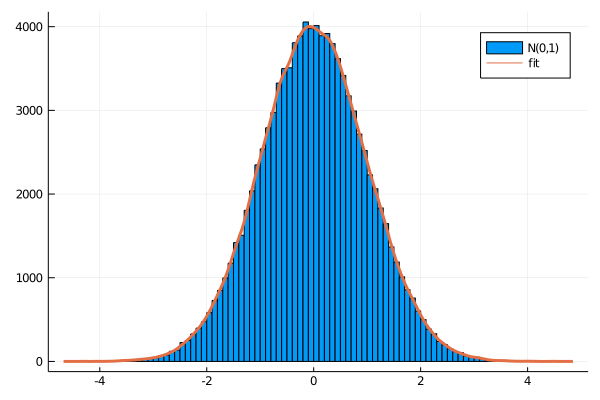

In [44]:
d = Distributions.Normal(0.0, 1.0) # Normal distribution with μ=0 y σ=0
@show params(d)
@show mean(d)
@show std(d);

randomVector = rand(d, 100000)
histogram(randomVector, label="N(0,1)")
p = kde(randomVector)
plot!(p.x, p.density .* length(randomVector) .* 0.1, linewidth=3, label="fit")

params(d) = (3.4877830882352936, 1.1392712102257678)


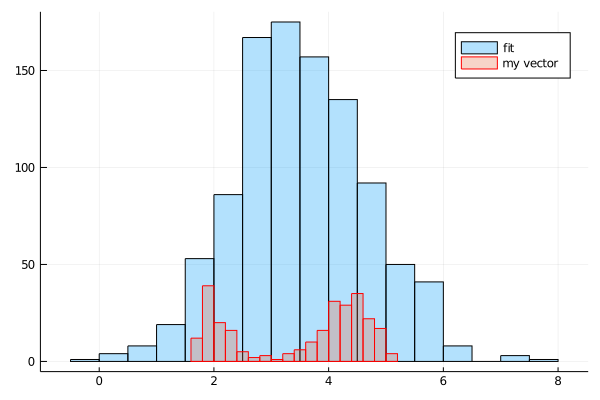

In [49]:
d = fit(Normal, eruptions)
@show params(d)

randomVector= rand(d, 1000)
histogram(randomVector, nbins=20, fillalpha=0.3, label="fit")
histogram!(eruptions, nbins=20, linecolor=:red, fillalpha=0.3, label="my vector")

## 5. Hypothesis testing

## 6. MLBase

The MLBase package provides useful tools for machine leaning applications (data preprocessing, performance evaluation, cross validation)



### Confusion matrix

In [53]:
k = 2 # no. of classes
gt = [1, 1, 1, 1, 1, 1, 1, 2]  # ground truths
pred = [1, 1, 2, 2, 1, 1, 1, 1]; # predictions 

Compute the confusion matrix

In [54]:
cm = confusmat(k, gt, pred)

2×2 Array{Int64,2}:
 5  2
 1  0

In [55]:
correctrate(gt, pred)

0.625

In [56]:
errorrate(gt, pred)

0.375

### ROC curve

In [58]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1];

In [60]:
ROC = MLBase.roc(gt, pred)

ROCNums{Int64}
  p = 7
  n = 1
  tp = 5
  tn = 0
  fp = 1
  fn = 2


In [72]:
recall(ROC)    

0.7142857142857143

In [73]:
precision(ROC)

0.8333333333333334